In [2]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [7]:
import re
import nltk
import string
from nltk.stem import WordNetLemmatizer
from html.parser import HTMLParser
import unicodedata

stopword_list = nltk.corpus.stopwords.words('english')
wnl = WordNetLemmatizer()
html_parser = HTMLParser()

def tokenize_text(text):
    tokens = nltk.word_tokenize(text) 
    tokens = [token.strip() for token in tokens]
    return tokens

def expand_contractions(text, contraction_mapping):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

In [14]:
#!conda install pattern

In [15]:
from pattern.en import tag
from nltk.corpus import wordnet as wn

# Annotate text tokens with POS tags
def pos_tag_text(text):
    
    def penn_to_wn_tags(pos_tag):
        if pos_tag.startswith('J'):
            return wn.ADJ
        elif pos_tag.startswith('V'):
            return wn.VERB
        elif pos_tag.startswith('N'):
            return wn.NOUN
        elif pos_tag.startswith('R'):
            return wn.ADV
        else:
            return None
    
    tagged_text = tag(text)
    tagged_lower_text = [(word.lower(), penn_to_wn_tags(pos_tag))
                         for word, pos_tag in
                         tagged_text]
    return tagged_lower_text
    
# lemmatize text based on POS tags    
def lemmatize_text(text):
    
    pos_tagged_text = pos_tag_text(text)
    lemmatized_tokens = [wnl.lemmatize(word, pos_tag) if pos_tag
                         else word                     
                         for word, pos_tag in pos_tagged_text]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text
    

def remove_special_characters(text):
    tokens = tokenize_text(text)
    pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
    filtered_tokens = filter(None, [pattern.sub(' ', token) for token in tokens])
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
    
    
def remove_stopwords(text):
    tokens = tokenize_text(text)
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text


def unescape_html(parser, text):
    
    return parser.unescape(text)

def normalize_corpus(corpus, lemmatize=True, tokenize=False):
    
    normalized_corpus = []  
    for text in corpus:
        text = html_parser.unescape(text)
        text = expand_contractions(text, CONTRACTION_MAP)
        if lemmatize:
            text = lemmatize_text(text)
        else:
            text = text.lower()
        text = remove_special_characters(text)
        text = remove_stopwords(text)
        if tokenize:
            text = tokenize_text(text)
            normalized_corpus.append(text)
        else:
            normalized_corpus.append(text)
            
    return normalized_corpus


def parse_document(document):
    document = re.sub('\n', ' ', document)
    if isinstance(document, str):
        document = document
    elif isinstance(document, unicode):
        return unicodedata.normalize('NFKD', document).encode('ascii', 'ignore')
    else:
        raise ValueError('Document is not string or unicode!')
    document = document.strip()
    sentences = nltk.sent_tokenize(document)
    sentences = [sentence.strip() for sentence in sentences]
    return sentences

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def build_feature_matrix(documents, feature_type='frequency'):

    feature_type = feature_type.lower().strip()  
    
    if feature_type == 'binary':
        vectorizer = CountVectorizer(binary=True, min_df=1, 
                                     ngram_range=(1, 1))
    elif feature_type == 'frequency':
        vectorizer = CountVectorizer(binary=False, min_df=1, 
                                     ngram_range=(1, 1))
    elif feature_type == 'tfidf':
        vectorizer = TfidfVectorizer(min_df=1, 
                                     ngram_range=(1, 1))
    else:
        raise Exception("Wrong feature type entered. Possible values: 'binary', 'frequency', 'tfidf'")

    feature_matrix = vectorizer.fit_transform(documents).astype(float)
    
    return vectorizer, feature_matrix


from scipy.sparse.linalg import svds
    
def low_rank_svd(matrix, singular_count=2):
    
    u, s, vt = svds(matrix, k=singular_count)
    return u, s, vt

In [8]:
import numpy as np

In [10]:
toy_text = """
Elephants are large mammals of the family Elephantidae 
and the order Proboscidea. Two species are traditionally recognised, 
the African elephant and the Asian elephant. Elephants are scattered 
throughout sub-Saharan Africa, South Asia, and Southeast Asia. Male 
African elephants are the largest extant terrestrial animals. All 
elephants have a long trunk used for many purposes, 
particularly breathing, lifting water and grasping objects. Their 
incisors grow into tusks, which can serve as weapons and as tools 
for moving objects and digging. Elephants' large ear flaps help 
to control their body temperature. Their pillar-like legs can 
carry their great weight. African elephants have larger ears 
and concave backs while Asian elephants have smaller ears 
and convex or level backs.  
"""

In [16]:
from gensim.summarization import summarize, keywords

def text_summarization_gensim(text, summary_ratio=0.5):
    
    summary = summarize(text, split=True, ratio=summary_ratio)
    for sentence in summary:
        print(sentence)

docs = parse_document(toy_text)
text = ' '.join(docs)
text_summarization_gensim(text, summary_ratio=0.4)


    
sentences = parse_document(toy_text)
norm_sentences = normalize_corpus(sentences,lemmatize=False) 

total_sentences = len(norm_sentences)
print('Total Sentences in Document:', total_sentences)  


Two species are traditionally recognised,  the African elephant and the Asian elephant.
All  elephants have a long trunk used for many purposes,  particularly breathing, lifting water and grasping objects.
Elephants' large ear flaps help  to control their body temperature.
Total Sentences in Document: 9


<ipython-input-15-7d1c4827e4f3>:59: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  text = html_parser.unescape(text)


In [19]:
num_sentences = 3
num_topics = 1

vec, dt_matrix = build_feature_matrix(sentences, 
                                      feature_type='frequency')

td_matrix = dt_matrix.transpose()
td_matrix = td_matrix.multiply(td_matrix > 0)

u, s, vt = low_rank_svd(td_matrix, singular_count=num_topics)  
                                         
sv_threshold = 0.5
min_sigma_value = max(s) * sv_threshold
s[s < min_sigma_value] = 0

salience_scores = np.sqrt(np.dot(np.square(s), np.square(vt)))
print(np.round(salience_scores, 2))

top_sentence_indices = salience_scores.argsort()[-num_sentences:][::-1]
top_sentence_indices.sort()
print(top_sentence_indices)

for index in top_sentence_indices:
    print(sentences[index])
    
    
def lsa_text_summarizer(documents, num_sentences=2,
                        num_topics=2, feature_type='frequency',
                        sv_threshold=0.5):
                            
    vec, dt_matrix = build_feature_matrix(documents, 
                                          feature_type=feature_type)

    td_matrix = dt_matrix.transpose()
    td_matrix = td_matrix.multiply(td_matrix > 0)

    u, s, vt = low_rank_svd(td_matrix, singular_count=num_topics)  
    min_sigma_value = max(s) * sv_threshold
    s[s < min_sigma_value] = 0
    
    salience_scores = np.sqrt(np.dot(np.square(s), np.square(vt)))
    top_sentence_indices = salience_scores.argsort()[-num_sentences:][::-1]
    top_sentence_indices.sort()
    
    for index in top_sentence_indices:
        print(sentences[index])

[1.87 1.84 1.51 1.12 1.96 2.17 0.68 0.28 4.45]
[4 5 8]
All  elephants have a long trunk used for many purposes,  particularly breathing, lifting water and grasping objects.
Their  incisors grow into tusks, which can serve as weapons and as tools  for moving objects and digging.
African elephants have larger ears  and concave backs while Asian elephants have smaller ears  and convex or level backs.


[[1.   0.   0.03 0.05 0.03 0.   0.15 0.   0.06]
 [0.   1.   0.   0.07 0.   0.   0.   0.   0.11]
 [0.03 0.   1.   0.03 0.02 0.   0.03 0.   0.04]
 [0.05 0.07 0.03 1.   0.03 0.   0.04 0.   0.11]
 [0.03 0.   0.02 0.03 1.   0.07 0.03 0.   0.04]
 [0.   0.   0.   0.   0.07 1.   0.   0.   0.  ]
 [0.15 0.   0.03 0.04 0.03 0.   1.   0.   0.05]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.06 0.11 0.04 0.11 0.04 0.   0.05 0.   1.  ]]
[0, 3, 8]
Elephants are large mammals of the family Elephantidae  and the order Proboscidea.
Male  African elephants are the largest extant terrestrial animals.
African elephants have larger ears  and concave backs while Asian elephants have smaller ears  and convex or level backs.


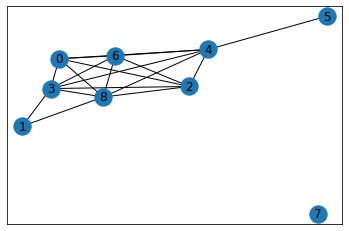

In [20]:
import networkx

num_sentences = 3
vec, dt_matrix = build_feature_matrix(norm_sentences, 
                                      feature_type='tfidf')
similarity_matrix = (dt_matrix * dt_matrix.T)
print(np.round(similarity_matrix.todense(), 2))

similarity_graph = networkx.from_scipy_sparse_matrix(similarity_matrix)

networkx.draw_networkx(similarity_graph)

scores = networkx.pagerank(similarity_graph)

ranked_sentences = sorted(((score, index) 
                            for index, score 
                            in scores.items()), 
                          reverse=True)
ranked_sentences

top_sentence_indices = [ranked_sentences[index][1] 
                        for index in range(num_sentences)]
top_sentence_indices.sort()
print(top_sentence_indices)

for index in top_sentence_indices:
    print(sentences[index])
    

def textrank_text_summarizer(documents, num_sentences=2,
                             feature_type='frequency'):
    
    vec, dt_matrix = build_feature_matrix(norm_sentences, 
                                      feature_type='tfidf')
    similarity_matrix = (dt_matrix * dt_matrix.T)
        
    similarity_graph = networkx.from_scipy_sparse_matrix(similarity_matrix)
    scores = networkx.pagerank(similarity_graph)   
    
    ranked_sentences = sorted(((score, index) 
                                for index, score 
                                in scores.items()), 
                              reverse=True)

    top_sentence_indices = [ranked_sentences[index][1] 
                            for index in range(num_sentences)]
    top_sentence_indices.sort()
    
    for index in top_sentence_indices:
        print(sentences[index])                          
    

DOCUMENT = """
The Elder Scrolls V: Skyrim is an open world action role-playing video game 
developed by Bethesda Game Studios and published by Bethesda Softworks. 
It is the fifth installment in The Elder Scrolls series, following 
The Elder Scrolls IV: Oblivion. Skyrim's main story revolves around 
the player character and their effort to defeat Alduin the World-Eater, 
a dragon who is prophesied to destroy the world. 
The game is set two hundred years after the events of Oblivion 
and takes place in the fictional province of Skyrim. The player completes quests 
and develops the character by improving skills. 
Skyrim continues the open world tradition of its predecessors by allowing the 
player to travel anywhere in the game world at any time, and to 
ignore or postpone the main storyline indefinitely. The player may freely roam 
over the land of Skyrim, which is an open world environment consisting 
of wilderness expanses, dungeons, cities, towns, fortresses and villages. 
Players may navigate the game world more quickly by riding horses, 
or by utilizing a fast-travel system which allows them to warp to previously 
Players have the option to develop their character. At the beginning of the game, 
players create their character by selecting one of several races, 
including humans, orcs, elves and anthropomorphic cat or lizard-like creatures, 
and then customizing their character's appearance.discovered locations. Over the 
course of the game, players improve their character's skills, which are numerical 
representations of their ability in certain areas. There are eighteen skills 
divided evenly among the three schools of combat, magic, and stealth. 
Skyrim is the first entry in The Elder Scrolls to include Dragons in the game's 
wilderness. Like other creatures, Dragons are generated randomly in the world 
and will engage in combat. 
"""

In [21]:
DOCUMENT_1 = """
The patient is an 86-year-old female admitted for evaluation of abdominal pain and bloody stools. The patient has colitis and also diverticulitis, undergoing treatment.
During the hospitalization, the patient complains of shortness of breath, which is worsening. The patient underwent an echocardiogram, which shows severe mitral regurgitation and also large pleural effusion.
This consultation is for further evaluation in this regard. As per the patient, she is an 86-year-old female, has limited activity level.
She has been having shortness of breath for many years. She also was told that she has a heart murmur, which was not followed through on a regular basis.
"""

DOCUMENT_2 = """ The patient is a very pleasant 41-year-old white female that is known to me previously from our work at the Pain Management Clinic, as well as from my residency training program, San Francisco. We have worked collaboratively for many years at the Pain Management Clinic and with her departure there, she has asked to establish with me for clinic pain management at my office. She reports moderate to severe pain related to a complicated past medical history. In essence, she was seen at a very young age at the clinic for bilateral knee and hip pain and diagnosed with bursitis at age 23. She was given nonsteroidals at that time, which did help with this discomfort. With time, however, this became inadequate and she was seen later in San Francisco in her mid 30s by Dr. V, an orthopedist who diagnosed retroverted hips at Hospital. She was referred for rehabilitation and strengthening. Most of this was focused on her SI joints. At that time, although she had complained of foot discomfort, she was not treated for it. This was in 1993 after which she and her new husband moved to the Boston area, where she lived from 1995-1996. She was seen at the Pain Center by Dr. R with similar complaints of hip and knee pain. She was seen by rheumatologists there and diagnosed with osteoarthritis as well as osteophytosis of the back. Medications at that time were salicylate and Ultram.
When she returned to Portland in 1996, she was then working for Dr. B. She was referred to a podiatrist by her local doctor who found several fractured sesamoid bones in her both feet, but this was later found not to be the case. Subsequently, nuclear bone scans revealed osteoarthritis. Orthotics were provided. She was given Paxil and Tramadol and subsequently developed an unfortunate side effect of grand mal seizure. During this workup of her seizure, imaging studies revealed a pericardial fluid-filled cyst adhered to her ventricle. She has been advised not to undergo any corrective or reparative surgery as well as to limit her activities since. She currently does not have an established cardiologist having just changed insurance plans. She is establishing care with Dr. S, of Rheumatology for her ongoing care. Up until today, her pain medications were being written by Dr. Y prior to establishing with Dr. L.
Pain management in town had been first provided by the office of Dr. F. Under his care, followup MRIs were done which showed ongoing degenerative disc disease, joint disease, and facet arthropathy in addition to previously described sacroiliitis. A number of medications were attempted there, including fentanyl patches with Flonase from 25 mcg titrated upwards to 50 mcg, but this caused oversedation. She then transferred her care to Ab Cd, FNP under the direction of Dr. K. Her care there was satisfactory, but because of her work schedule, the patient found this burdensome as well as the guidelines set forth in terms of monthly meetings and routine urine screens. Because of a previous commitment, she was unable to make one unscheduled request to their office in order to produce a random urine screen and was therefore discharged.
"""

In [25]:
sentences = parse_document(DOCUMENT_1)
norm_sentences = normalize_corpus(sentences,lemmatize=True) 
print("Total Sentences:", len(norm_sentences))

print ("\n---------lsa summarization for document 1--------")
lsa_text_summarizer(sentences, num_sentences=2,
                    num_topics=2, feature_type='frequency',
                    sv_threshold=0.5)

print ("---------text-rank summarization for document 1--------\n")
textrank_text_summarizer(sentences, num_sentences=2,
                         feature_type='tfidf')

Total Sentences: 8

---------lsa summarization for document 1--------
The patient is an 86-year-old female admitted for evaluation of abdominal pain and bloody stools.
She also was told that she has a heart murmur, which was not followed through on a regular basis.
---------text-rank summarization for document 1--------

The patient is an 86-year-old female admitted for evaluation of abdominal pain and bloody stools.
As per the patient, she is an 86-year-old female, has limited activity level.


<ipython-input-15-7d1c4827e4f3>:59: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  text = html_parser.unescape(text)


In [26]:
sentences = parse_document(DOCUMENT_2)
norm_sentences = normalize_corpus(sentences,lemmatize=True)
print("Total Sentences:", len(norm_sentences))

print ("\n---------lsa summarization for document 2--------")
lsa_text_summarizer(sentences, num_sentences=2,
                    num_topics=2, feature_type='frequency',
                    sv_threshold=0.5)

print ("---------text-rank summarization for document 2--------\n")
textrank_text_summarizer(sentences, num_sentences=2,
                         feature_type='tfidf')

Total Sentences: 26

---------lsa summarization for document 2--------
Up until today, her pain medications were being written by Dr. Y prior to establishing with Dr. L. Pain management in town had been first provided by the office of Dr. F. Under his care, followup MRIs were done which showed ongoing degenerative disc disease, joint disease, and facet arthropathy in addition to previously described sacroiliitis.
She then transferred her care to Ab Cd, FNP under the direction of Dr. K. Her care there was satisfactory, but because of her work schedule, the patient found this burdensome as well as the guidelines set forth in terms of monthly meetings and routine urine screens.
---------text-rank summarization for document 2--------

She was seen at the Pain Center by Dr. R with similar complaints of hip and knee pain.
Up until today, her pain medications were being written by Dr. Y prior to establishing with Dr. L. Pain management in town had been first provided by the office of Dr. F. U

<ipython-input-15-7d1c4827e4f3>:59: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  text = html_parser.unescape(text)
